# Import librairies

In [1]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
from seaborn import heatmap

# Load global tourist cast dataset

In [2]:
df = pd.read_csv('touristcast_global_DS.csv',index_col=0)
df.info()

#FR-IDF_NC_FR Ile de France nb stays in camping by domestic
#FR-CVL_NC_FR Centre Val de Loire
#FR-BFC_NC_FR Bourgogne France Comte
#FR-NOR_NC_FR Normandie
#FR-HDF_NC_FR Haut de France
#FR-GES_NC_FR Grand Est
#FR-PDL_NC_FR Pays de la Loire
#FR-BRE_NC_FR Bretagne
#FR-NAQ_NC_FR Nouvelle Aquitaine
#FR-OCC_NC_FR Occitanie
#FR-ARA_NC_FR Auvergne Rhone Alpes
#FR-PAC_NC_FR Provence Alpes Cote d'Azur
#FR-COR_NC_FR Corse

#NC_ET nb stays in camping by international
#NH_FR nb stays in camping by domestic
#NH_ET nb stays in camping by international

#A-NB nb airports
#H-NB nb UNESCO heritage

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 2010-01 to 2018-05
Data columns (total 92 columns):
FR-IDF_NC_FR      48 non-null float64
FR-CVL_NC_FR      48 non-null float64
FR-BFC_NC_FR      48 non-null float64
FR-NOR_NC_FR      48 non-null float64
FR-HDF_NC_FR      48 non-null float64
FR-GES_NC_FR      48 non-null float64
FR-PDL_NC_FR      48 non-null float64
FR-BRE_NC_FR      48 non-null float64
FR-NAQ_NC_FR      48 non-null float64
FR-OCC_NC_FR      48 non-null float64
FR-ARA_NC_FR      48 non-null float64
FR-PAC_NC_FR      48 non-null float64
FR-COR_NC_FR      48 non-null float64
FR-IDF_NC_ET      48 non-null float64
FR-CVL_NC_ET      48 non-null float64
FR-BFC_NC_ET      48 non-null float64
FR-NOR_NC_ET      48 non-null float64
FR-HDF_NC_ET      48 non-null float64
FR-GES_NC_ET      48 non-null float64
FR-PDL_NC_ET      48 non-null float64
FR-BRE_NC_ET      48 non-null float64
FR-NAQ_NC_ET      48 non-null float64
FR-OCC_NC_ET      48 non-null float64
FR-ARA_NC_ET    

In [3]:
df.head()

,FR-IDF_NC_FR,FR-CVL_NC_FR,FR-BFC_NC_FR,FR-NOR_NC_FR,FR-HDF_NC_FR,FR-GES_NC_FR,FR-PDL_NC_FR,FR-BRE_NC_FR,FR-NAQ_NC_FR,FR-OCC_NC_FR,...,FR-CVL-H-NB,FR-COR-H-NB,FR-GES-H-NB,FR-HDF-H-NB,FR-IDF-H-NB,FR-NOR-H-NB,FR-NAQ-H-NB,FR-OCC-H-NB,FR-PDL-H-NB,FR-PAC-H-NB
2010-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,1,7,3,4,2,5,6,0,3
2010-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,1,7,3,4,2,5,6,0,3
2010-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,1,7,3,4,2,5,6,0,3
2010-04,63.65,44.52,28.64,143.52,56.02,47.73,433.35,365.68,624.79,513.75,...,3,1,7,3,4,2,5,6,0,3
2010-05,67.68,94.46,82.30,186.42,84.02,96.85,506.49,443.73,709.12,784.57,...,3,1,7,3,4,2,5,6,0,3


In [3]:
#airports datas are not used because datas are constant overtime
col_airports_to_drop = ['FR-ARA-A-NB','FR-BFC-A-NB','FR-BRE-A-NB','FR-CVL-A-NB','FR-COR-A-NB','FR-GES-A-NB','FR-HDF-A-NB','FR-IDF-A-NB','FR-NOR-A-NB','FR-NAQ-A-NB','FR-OCC-A-NB','FR-PDL-A-NB','FR-PAC-A-NB']

df = df.drop(col_airports_to_drop,axis=1)

In [4]:
#heritage datas are not used because datas are constant overtime
col_heritage_to_drop = ['FR-ARA-H-NB','FR-BFC-H-NB','FR-BRE-H-NB','FR-CVL-H-NB','FR-COR-H-NB','FR-GES-H-NB','FR-HDF-H-NB','FR-IDF-H-NB','FR-NOR-H-NB','FR-NAQ-H-NB','FR-OCC-H-NB','FR-PDL-H-NB','FR-PAC-H-NB']

df = df.drop(col_heritage_to_drop,axis=1)

In [5]:
#delete campings FR
col_C_FR_to_drop = ['FR-IDF_NC_FR','FR-CVL_NC_FR','FR-BFC_NC_FR','FR-NOR_NC_FR','FR-HDF_NC_FR','FR-GES_NC_FR','FR-PDL_NC_FR','FR-BRE_NC_FR','FR-NAQ_NC_FR','FR-OCC_NC_FR','FR-ARA_NC_FR','FR-PAC_NC_FR','FR-COR_NC_FR']

df = df.drop(col_C_FR_to_drop,axis=1)

In [6]:
#delete campings ET
col_C_ET_to_drop = ['FR-IDF_NC_ET','FR-CVL_NC_ET','FR-BFC_NC_ET','FR-NOR_NC_ET','FR-HDF_NC_ET','FR-GES_NC_ET','FR-PDL_NC_ET','FR-BRE_NC_ET','FR-NAQ_NC_ET','FR-OCC_NC_ET','FR-ARA_NC_ET','FR-PAC_NC_ET','FR-COR_NC_ET']

df = df.drop(col_C_ET_to_drop,axis=1)

# Heatmap

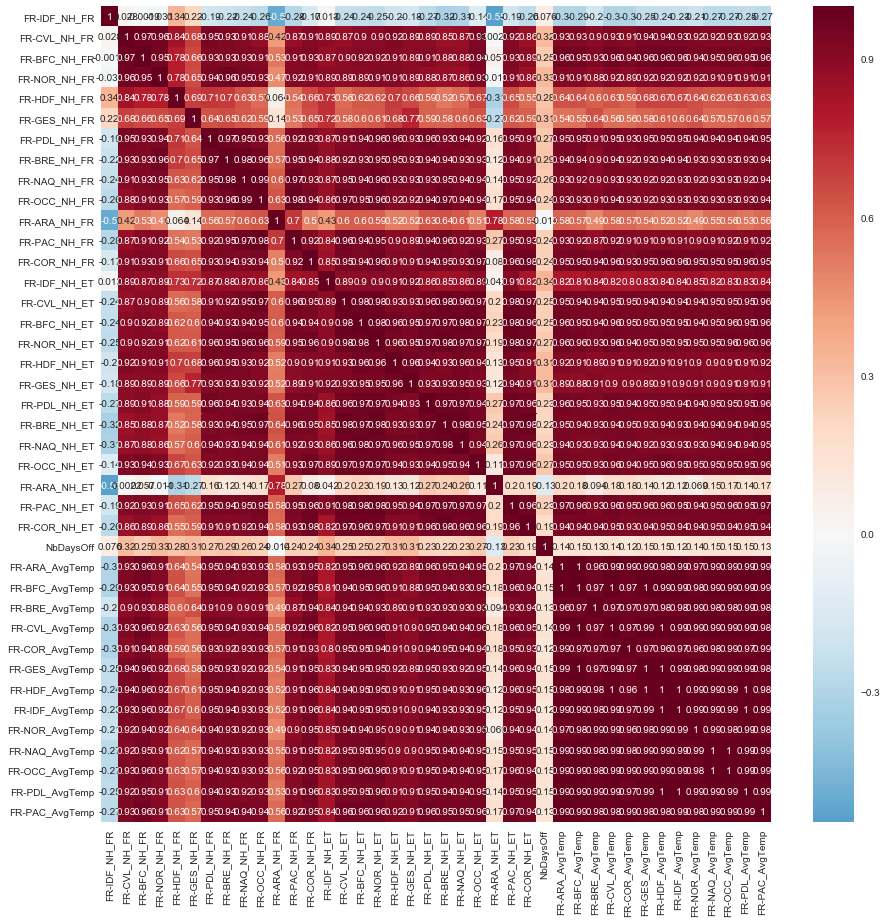

In [7]:
plt.figure(figsize=(15,15))
heatmap(df.corr(),annot=True,center=0,cmap='RdBu_r')